In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
df = pd.read_csv("../DATA/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

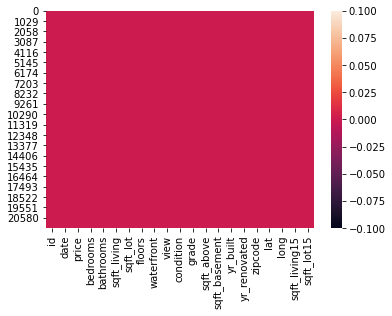

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

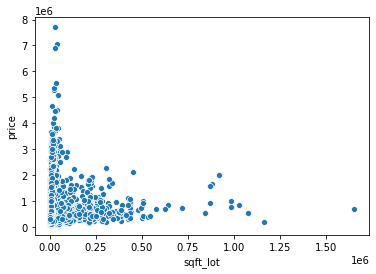

In [7]:
sns.scatterplot(x='sqft_lot',y='price',data=df)

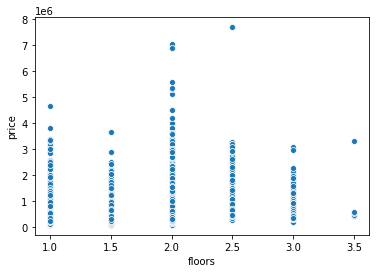

In [8]:
sns.scatterplot(x='floors',y='price',data=df)

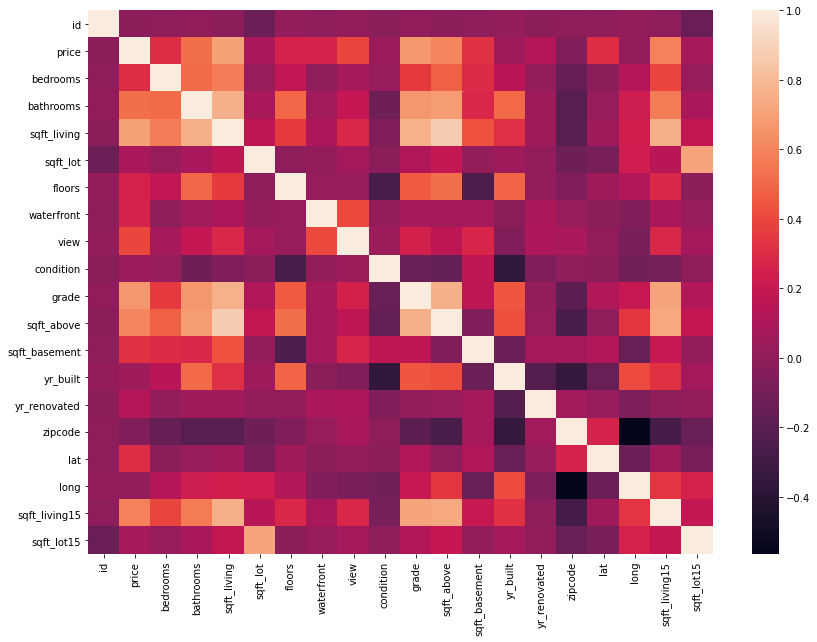

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr())

In [14]:
df.sort_values(by="price", ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [15]:
not_top_1_percent = df.sort_values(by="price", ascending = False)[216:]

In [16]:
not_top_1_percent

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [17]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [18]:
21597-21381

216

In [19]:
df['price'].iplot()

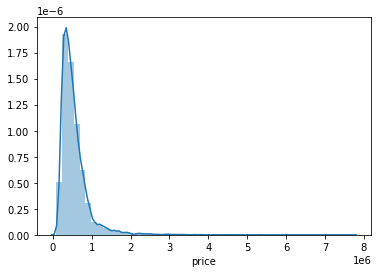

In [20]:
sns.distplot(df['price'])

In [21]:
not_top_1_percent['price'].iplot(mode="markers",size=4,color='teal')

In [22]:
df[df['price']>2000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
153,7855801670,4/1/2015,2250000.0,4,3.25,5180,19850,2.0,0,3,...,12,3540,1640,2006,0,98006,47.5620,-122.162,3160,9750
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1,4,...,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841
269,7960900060,5/4/2015,2900000.0,4,3.25,5050,20100,1.5,0,2,...,11,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060
282,7424700045,5/13/2015,2050000.0,5,3.00,3830,8480,2.0,0,1,...,9,2630,1200,1905,1994,98122,47.6166,-122.287,3050,7556
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21294,2154970020,7/3/2014,2350000.0,4,4.25,5010,19412,2.0,0,1,...,11,4000,1010,2014,0,98040,47.5455,-122.211,3820,17064
21352,9533100285,6/30/2014,2070000.0,4,3.75,4350,7965,2.0,0,0,...,10,4350,0,2013,0,98004,47.6289,-122.205,2190,8557
21490,2524069097,5/9/2014,2240000.0,5,6.50,7270,130017,2.0,0,0,...,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890
21514,8964800330,4/7/2015,3000000.0,4,3.75,5090,14823,1.0,0,0,...,11,4180,910,2013,0,98004,47.6200,-122.207,3030,12752


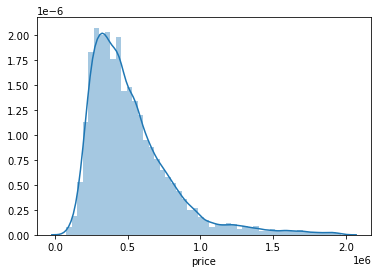

In [23]:
sns.distplot(not_top_1_percent['price'])

In [24]:
not_top_1_percent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21381 entries, 6329 to 15279
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21381 non-null  int64  
 1   date           21381 non-null  object 
 2   price          21381 non-null  float64
 3   bedrooms       21381 non-null  int64  
 4   bathrooms      21381 non-null  float64
 5   sqft_living    21381 non-null  int64  
 6   sqft_lot       21381 non-null  int64  
 7   floors         21381 non-null  float64
 8   waterfront     21381 non-null  int64  
 9   view           21381 non-null  int64  
 10  condition      21381 non-null  int64  
 11  grade          21381 non-null  int64  
 12  sqft_above     21381 non-null  int64  
 13  sqft_basement  21381 non-null  int64  
 14  yr_built       21381 non-null  int64  
 15  yr_renovated   21381 non-null  int64  
 16  zipcode        21381 non-null  int64  
 17  lat            21381 non-null  float64
 18  lon

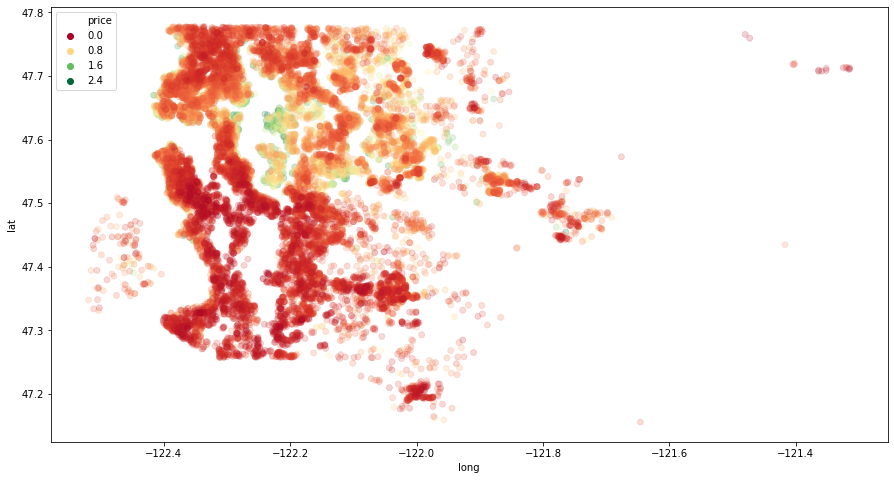

In [25]:
plt.figure(figsize=(15,8))
sns.scatterplot(y='lat',x='long',data=not_top_1_percent,hue='price',palette="RdYlGn",edgecolor=None,alpha=0.2)
# alpha checks for opacity

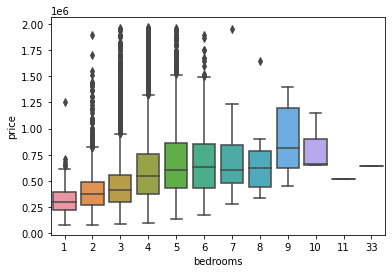

In [26]:
sns.boxplot(x='bedrooms',y='price',data=not_top_1_percent)

In [27]:
not_top_1_percent.drop(['id','zipcode'],axis=1,inplace=True)

In [28]:
not_top_1_percent

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
6329,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347
12271,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486
9166,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,47.5287,-122.220,3730,16560
12565,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,47.6422,-122.157,3900,35237
1150,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,47.4799,-122.296,1572,10570
8267,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,47.4987,-122.341,1140,11250
16184,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,47.4808,-122.315,860,9000
465,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909,1200,7500


In [29]:
not_top_1_percent['date'] = pd.to_datetime(not_top_1_percent['date'])

In [30]:
def year_extraction(date):
    return date.year
def month_extraction(date):
    return date.month

In [31]:
not_top_1_percent['year'] = not_top_1_percent['date'].apply(year_extraction)
not_top_1_percent['month'] = not_top_1_percent['date'].apply(month_extraction)

In [32]:
not_top_1_percent

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
6329,2014-06-02,1970000.0,4,3.50,4370,8510,2.0,0,1,3,...,3610,760,2003,0,47.5876,-122.204,2960,10347,2014,6
12271,2014-10-15,1960000.0,5,4.50,6200,23373,3.0,0,1,4,...,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014,10
9166,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,4,...,1940,1390,1960,0,47.5287,-122.220,3730,16560,2015,2
12565,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,3,...,4430,0,1998,0,47.6422,-122.157,3900,35237,2015,4
1150,2015-04-21,1960000.0,4,2.75,3120,7898,1.0,1,4,4,...,1560,1560,1963,0,47.7165,-122.259,2630,13868,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,2014-05-08,82500.0,2,1.00,520,22334,1.0,0,0,2,...,520,0,1951,0,47.4799,-122.296,1572,10570,2014,5
8267,2014-11-05,82000.0,3,1.00,860,10426,1.0,0,0,3,...,860,0,1954,0,47.4987,-122.341,1140,11250,2014,11
16184,2015-03-24,81000.0,2,1.00,730,9975,1.0,0,0,1,...,730,0,1943,0,47.4808,-122.315,860,9000,2015,3
465,2014-05-23,80000.0,1,0.75,430,5050,1.0,0,0,2,...,430,0,1912,0,47.6499,-121.909,1200,7500,2014,5


In [33]:
not_top_1_percent['month'].value_counts()

5     2381
4     2209
7     2191
6     2155
8     1917
10    1863
3     1855
9     1756
12    1455
11    1394
2     1237
1      968
Name: month, dtype: int64

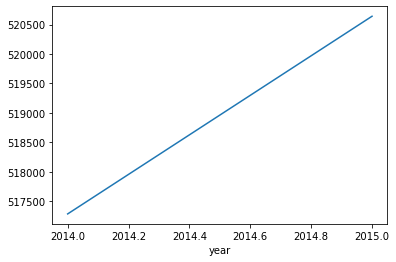

In [34]:
not_top_1_percent.groupby('year').mean()['price'].plot()

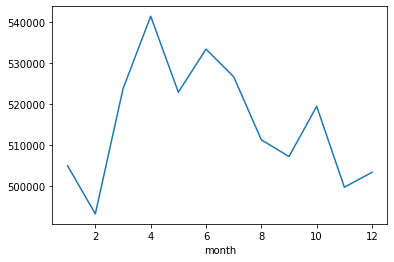

In [35]:
not_top_1_percent.groupby('month').mean()['price'].plot()

In [36]:
not_top_1_percent = not_top_1_percent.drop(['month','date'],axis=1)

In [37]:
not_top_1_percent

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year
6329,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,2014
12271,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,47.5632,-122.215,3700,14486,2014
9166,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,47.5287,-122.220,3730,16560,2015
12565,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,47.6422,-122.157,3900,35237,2015
1150,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,47.7165,-122.259,2630,13868,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,47.4799,-122.296,1572,10570,2014
8267,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,47.4987,-122.341,1140,11250,2014
16184,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,47.4808,-122.315,860,9000,2015
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,47.6499,-121.909,1200,7500,2014


In [95]:
not_top_1_percent.corr()['price']

price            1.000000
bedrooms         0.315243
bathrooms        0.507692
sqft_living      0.678717
sqft_lot         0.098535
floors           0.279140
waterfront       0.143594
view             0.343710
condition        0.036132
grade            0.680634
sqft_above       0.583757
sqft_basement    0.284659
yr_built         0.063608
yr_renovated     0.119732
lat              0.364436
long             0.041848
sqft_living15    0.602252
sqft_lot15       0.088468
year             0.005513
Name: price, dtype: float64

In [96]:
imp_feat = not_top_1_percent.drop(['sqft_lot','condition','yr_built','yr_renovated','long','sqft_lot15','year'],axis=1)

In [106]:
X_train.shape

(14966, 11)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = not_top_1_percent.drop('price',axis=1).values
y = not_top_1_percent['price'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
scaler.fit(X_train)

MinMaxScaler()

In [44]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
X_train

array([[0.        , 0.07142857, 0.05578231, ..., 0.21013133, 0.00219976,
        0.        ],
       [0.0625    , 0.17857143, 0.2       , ..., 0.41275797, 0.01148586,
        0.        ],
       [0.09375   , 0.25      , 0.25714286, ..., 0.2945591 , 0.02679803,
        1.        ],
       ...,
       [0.09375   , 0.28571429, 0.28435374, ..., 0.37148218, 0.03750966,
        0.        ],
       [0.09375   , 0.42857143, 0.5292517 , ..., 0.69981238, 0.01434267,
        0.        ],
       [0.09375   , 0.21428571, 0.19047619, ..., 0.20450281, 0.00947563,
        0.        ]])

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [51]:
model = Sequential()

model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))
model.add(Dense(11,activation="relu"))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [52]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=350)

Epoch 1/350
468/468 [==============================] - 2s 5ms/step - loss: 348133556224.0000 - val_loss: 331968970752.0000
Epoch 2/350
468/468 [==============================] - 3s 5ms/step - loss: 224098533376.0000 - val_loss: 80722173952.0000
Epoch 3/350
468/468 [==============================] - 3s 6ms/step - loss: 57562038272.0000 - val_loss: 52317741056.0000
Epoch 4/350
468/468 [==============================] - 3s 6ms/step - loss: 52050341888.0000 - val_loss: 49940836352.0000
Epoch 5/350
468/468 [==============================] - 3s 5ms/step - loss: 49659052032.0000 - val_loss: 47612211200.0000
Epoch 6/350
468/468 [==============================] - 2s 5ms/step - loss: 47303643136.0000 - val_loss: 45262876672.0000
Epoch 7/350
468/468 [==============================] - 3s 6ms/step - loss: 44945981440.0000 - val_loss: 42945572864.0000
Epoch 8/350
468/468 [==============================] - 3s 6ms/step - loss: 42624249856.0000 - val_loss: 40689491968.0000
Epoch 9/350
468/468 [========

468/468 [==============================] - 3s 6ms/step - loss: 22267529216.0000 - val_loss: 22210717696.0000
Epoch 69/350
468/468 [==============================] - 3s 6ms/step - loss: 22231248896.0000 - val_loss: 22209239040.0000
Epoch 70/350
468/468 [==============================] - 3s 6ms/step - loss: 22203660288.0000 - val_loss: 22132514816.0000
Epoch 71/350
468/468 [==============================] - 3s 6ms/step - loss: 22169726976.0000 - val_loss: 22113368064.0000
Epoch 72/350
468/468 [==============================] - 3s 6ms/step - loss: 22137044992.0000 - val_loss: 22076825600.0000
Epoch 73/350
468/468 [==============================] - 3s 6ms/step - loss: 22117605376.0000 - val_loss: 22093826048.0000
Epoch 74/350
468/468 [==============================] - 3s 6ms/step - loss: 22085330944.0000 - val_loss: 22014754816.0000
Epoch 75/350
468/468 [==============================] - 3s 5ms/step - loss: 22047795200.0000 - val_loss: 22028259328.0000
Epoch 76/350
468/468 [===============

Epoch 135/350
468/468 [==============================] - 2s 5ms/step - loss: 21307428864.0000 - val_loss: 21192558592.0000
Epoch 136/350
468/468 [==============================] - 2s 5ms/step - loss: 21312038912.0000 - val_loss: 21185888256.0000
Epoch 137/350
468/468 [==============================] - 2s 5ms/step - loss: 21272084480.0000 - val_loss: 21221111808.0000
Epoch 138/350
468/468 [==============================] - 2s 5ms/step - loss: 21291677696.0000 - val_loss: 21206540288.0000
Epoch 139/350
468/468 [==============================] - 2s 5ms/step - loss: 21291681792.0000 - val_loss: 21206157312.0000
Epoch 140/350
468/468 [==============================] - 2s 5ms/step - loss: 21284835328.0000 - val_loss: 21239212032.0000
Epoch 141/350
468/468 [==============================] - 2s 5ms/step - loss: 21294848000.0000 - val_loss: 21166649344.0000
Epoch 142/350
468/468 [==============================] - 2s 5ms/step - loss: 21278085120.0000 - val_loss: 21297989632.0000
Epoch 143/350
46

468/468 [==============================] - 2s 5ms/step - loss: 21089323008.0000 - val_loss: 20962371584.0000
Epoch 202/350
468/468 [==============================] - 3s 6ms/step - loss: 21091756032.0000 - val_loss: 20962535424.0000
Epoch 203/350
468/468 [==============================] - 3s 6ms/step - loss: 21092200448.0000 - val_loss: 20977715200.0000
Epoch 204/350
468/468 [==============================] - 2s 5ms/step - loss: 21066276864.0000 - val_loss: 21004294144.0000
Epoch 205/350
468/468 [==============================] - 3s 6ms/step - loss: 21090500608.0000 - val_loss: 20978014208.0000
Epoch 206/350
468/468 [==============================] - 3s 6ms/step - loss: 21073311744.0000 - val_loss: 20958279680.0000
Epoch 207/350
468/468 [==============================] - 3s 6ms/step - loss: 21077475328.0000 - val_loss: 20992679936.0000
Epoch 208/350
468/468 [==============================] - 3s 6ms/step - loss: 21075175424.0000 - val_loss: 20942934016.0000
Epoch 209/350
468/468 [=======

468/468 [==============================] - 2s 5ms/step - loss: 21013952512.0000 - val_loss: 20866052096.0000
Epoch 268/350
468/468 [==============================] - 2s 5ms/step - loss: 21017649152.0000 - val_loss: 20867704832.0000
Epoch 269/350
468/468 [==============================] - 2s 5ms/step - loss: 21009602560.0000 - val_loss: 20965052416.0000
Epoch 270/350
468/468 [==============================] - 2s 5ms/step - loss: 21007425536.0000 - val_loss: 20875814912.0000
Epoch 271/350
468/468 [==============================] - 3s 5ms/step - loss: 21010348032.0000 - val_loss: 20891060224.0000
Epoch 272/350
468/468 [==============================] - 3s 5ms/step - loss: 21012529152.0000 - val_loss: 20863451136.0000
Epoch 273/350
468/468 [==============================] - 3s 6ms/step - loss: 21009176576.0000 - val_loss: 20885790720.0000
Epoch 274/350
468/468 [==============================] - 2s 5ms/step - loss: 21014568960.0000 - val_loss: 20921171968.0000
Epoch 275/350
468/468 [=======

468/468 [==============================] - 3s 5ms/step - loss: 20950396928.0000 - val_loss: 20806213632.0000
Epoch 334/350
468/468 [==============================] - 2s 5ms/step - loss: 20949561344.0000 - val_loss: 20802639872.0000
Epoch 335/350
468/468 [==============================] - 3s 6ms/step - loss: 20947146752.0000 - val_loss: 20794714112.0000
Epoch 336/350
468/468 [==============================] - 2s 5ms/step - loss: 20951828480.0000 - val_loss: 20845060096.0000
Epoch 337/350
468/468 [==============================] - 2s 5ms/step - loss: 20952260608.0000 - val_loss: 20787730432.0000
Epoch 338/350
468/468 [==============================] - 2s 5ms/step - loss: 20957061120.0000 - val_loss: 20850345984.0000
Epoch 339/350
468/468 [==============================] - 2s 5ms/step - loss: 20956450816.0000 - val_loss: 20838772736.0000
Epoch 340/350
468/468 [==============================] - 3s 5ms/step - loss: 20940951552.0000 - val_loss: 20788469760.0000
Epoch 341/350
468/468 [=======

In [53]:
losses = pd.DataFrame(model.history.history)

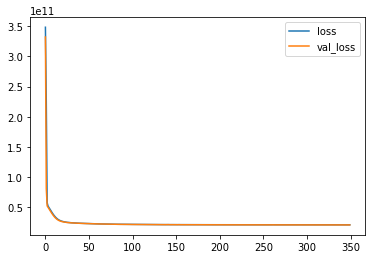

In [54]:
losses.plot()

In [55]:
losses.iplot()

In [56]:
predictions = model.predict(X_test)

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
mean_squared_error(y_test,predictions)

20778935222.46106

In [59]:
mean_absolute_error(y_test,predictions)

97792.18718518609